<a href="https://colab.research.google.com/github/sowmyarajesh/ML_ANN/blob/main/ANN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.8.0


### Load and preprocess the data

In [7]:
# import the dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

understanding the data

In [8]:
# size of the training and testing data set
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
y_train[0]

9

We see that the input data is a pixel value of the images in the 28 X 28 matrix.

the output data is a categorical index of the type of clothing the image represents.

In [12]:
# the max, min, average pixel value in the dataset
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [14]:
np.max(y_train), np.min(y_train)

(9, 0)

There are 10 catergories [0,1,..9]

In [15]:
categories = [
    "0 T-shirt/top",
    "1 Trouser",
    "2 Pullover",
    "3 Dress",
    "4 Coat",
    "5 Sandal",
    "6 Shirt",
    "7 Sneaker",
    "8 Bag",
    "9 Ankle boot"
]

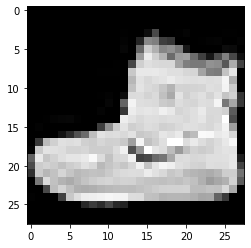

In [17]:
plt.imshow(x_train[0], cmap='gray')

Normalize the data

In [18]:
x_train = x_train/255.0
x_test = x_test/255.0

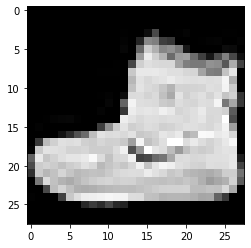

In [19]:
plt.imshow(x_train[0], cmap="gray")

Flatten the data as the current input is 28 X 28


In [20]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [21]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### Build the model

To build the model,first initialize the model


In [32]:
# initialize the sequence
model = tf.keras.models.Sequential()


**Input layer**

 we will use the following parameters in input layer
(units=128,  activation='relu',  input_shape=(784,))


units : This can be any number with in the number of inputs to be filters from the input features. We start with different 128. 

activation: relu is the activation function as it is faster than sigmoid/ tanh functions

input_shape : it shows the number of columns in the input. 

In [33]:
inputLayer = tf.keras.layers.Dense(units=255, activation='relu', input_shape=((784,)))
model.add(inputLayer)

**Hidden Layer:**

Add a hidden layer for dropout (regulaization technique where the features are randomly ignored during the training process. This means the ignored features are not considered during the backward propagation process).

Dropout layer will help in reducing the chances of overfitting the model

Dropout function will take the percentage of the features to drop

In [34]:
hiddenLayer1 = tf.keras.layers.Dropout(0.2)
model.add(hiddenLayer1)

**Output layer:**

Only two parameters are needed for the output layer in this function

number of units to output = 10 as we have 10 classes

activation later = softmax for this model.

softmax function is used for multiclass classification

sigmoid function is used for binary classification

In [35]:
outputLayer = tf.keras.layers.Dense(units=10, activation="softmax")
model.add(outputLayer)

### Train the model

**Compile the model:**

First step to training is compile the defined model. 

The compiling step requires three parameters

optimizer = the function used to minimize the loss function. "adam" is the most common optimizer used

loss function = acts as a guide to the optimizer in the right direction so that optimizer can reach the global minimum. Since this is a multi-label classification problem, we will be using sparse_categorical_crossentropy

metrices = this will list the performance metrices to be considered in guiding the optimizer in the right direction. In this model, we will be using the sparse_categorical_accuracy

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 255)               200175    
                                                                 
 dropout_1 (Dropout)         (None, 255)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2560      
                                                                 
Total params: 202,735
Trainable params: 202,735
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2134 - sparse_categorical_accuracy: 0.9196
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2087 - sparse_categorical_accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2052 - sparse_categorical_accuracy: 0.9225
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1999 - sparse_categorical_accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2022 - sparse_categorical_accuracy: 0.9237
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1959 - sparse_categorical_accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1922 - sparse_categorical_accuracy: 0.9267
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1929 - sparse_categorical_accuracy: 0.9257
Epoch 9/10
1875/1875 [=====================

### Evaluate the model

In [54]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

 50/313 [===>..........................] - ETA: 0s - loss: 0.3523 - sparse_categorical_accuracy: 0.8969

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 0.3750 - sparse_categorical_accuracy: 0.8904


In [55]:
print("Accuracy value = ", test_accuracy)

Accuracy value =  0.8903999924659729


In [61]:
from sklearn import metrics

y_pred =np.argmax(model.predict(x_test),axis=1)
print(y_pred)
metrics.confusion_matrix(y_test,y_pred)

[9 2 1 ... 8 1 5]


array([[890,   2,  15,  11,   1,   2,  74,   0,   5,   0],
       [  2, 981,   1,   8,   2,   0,   6,   0,   0,   0],
       [ 25,   1, 832,   5,  71,   0,  66,   0,   0,   0],
       [ 30,   4,  16, 884,  31,   0,  31,   0,   4,   0],
       [  0,   0,  99,  23, 794,   0,  82,   0,   2,   0],
       [  0,   0,   0,   1,   0, 967,   0,  21,   0,  11],
       [161,   2,  96,  18,  45,   0, 672,   0,   6,   0],
       [  0,   0,   0,   0,   0,   6,   0, 982,   0,  12],
       [  3,   0,   5,   5,   3,   5,   5,   2, 972,   0],
       [  0,   0,   0,   0,   0,   7,   1,  62,   0, 930]])

In [62]:
metrics.accuracy_score(y_test,y_pred)

0.8904